# Cell Tissue Simulations
##### Benjamin Laier

In [2]:
# import libaries
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import os
from time import time
from time import perf_counter

#import costum modules
import simulation.initialization as init
import simulation.geometry as geom
import simulation.dynamics as dyn
import simulation.analysis as ana
import simulation.visualization as vis
import simulation.utils as utils

# import functions
from simulation import (
    initialize_box,
    load_configuration,
    update_positions_and_polarizations,
    voronoi_tessellation,
    rdf_pol_alignment_avg,
    compute_msd_cm,
    plot_voronoi,
    make_video_from_images
)


In [3]:
def simulation_loop(N = 100, phi = 0.25, dt = 0.01, T = 20, P_0 = 3.8, J = 0.00, run = 'any', equi_steps = 200, plot = False, save_interval = 5, load_run = None):

    # initialize parameters
    L = np.sqrt(N / phi) # Box size
    steps = int(T / dt)  # Number of steps

    A_0 = 1.0  # Target area
    mu = 1.0  # Mobility
    K_A = 1.0  # Area stiffness
    K_P = 1.0  # Perimeter stiffness
    f_0 = 1.0  # Active force magnitude
    D_r = 0.5  # Rotational diffusion coefficient

    # Save simulation parameters to a text file
    output_dir = os.path.join("data", run)
    os.makedirs(output_dir, exist_ok=True)
    params_filename = os.path.join(output_dir, "params.txt")

    with open(params_filename, "w") as f:
        f.write(f"N = {N} Number of cells\n")
        f.write(f"phi = {phi} packing fraction\n")
        f.write(f"L = {L} Box size\n")
        f.write(f"dt = {dt} Time step\n")
        f.write(f"T = {T} Total simulation time\n")
        f.write(f"steps = {steps} Number of steps\n")
        f.write(f"mu = {mu} Mobility\n")
        f.write(f"J = {J} Alignment strength\n")
        f.write(f"D_r = {D_r} Rotational diffusion coefficient\n")
        f.write(f"K_A = {K_A} Area stiffness\n")
        f.write(f"A_0 = {A_0} Target area\n")
        f.write(f"K_P = {K_P} Perimeter stiffness\n")
        f.write(f"P_0 = {P_0} Target perimeter\n")
        f.write(f"f_0 = {f_0} Active force magnitude\n")
    
    # initialize box/configuration
    if load_run is not None:
        pos, pol = load_configuration(load_run, N)
    else:
        pos, pol = initialize_box(N, L)

    #equilibration
    print("Equilibrating system...")
    for i in tqdm(range(equi_steps)):
        pos, pol = update_positions_and_polarizations(
            pos, pol, K_A, A_0, K_P, P_0, f_0, mu, J, dt, D_r, N, L)
        
    #loop over time steps
    start_value = 0

    pos_all = np.zeros((start_value + steps, N, 2))
    pol_all = np.zeros((start_value + steps, N, 2))

    save_interval = 5  # Save every 5 steps
    pos_all_filename = os.path.join(output_dir, "pos_all.npy")
    pol_all_filename = os.path.join(output_dir, "pol_all.npy")

    print("Starting simulation...")
    # Simulation loop
    for t in tqdm(range(start_value, start_value + steps)):

        # Update positions and polarizations
        pos, pol = update_positions_and_polarizations(
            pos, pol , K_A, A_0, K_P, P_0, f_0, mu, J, dt, D_r, N, L
            )
        
        # Store positions and polarizations
        pos_all[t] = pos
        pol_all[t] = pol

        if t%save_interval == 0:
            cells = voronoi_tessellation(pos, L, N)
            plot_voronoi(cells, pol, L, step = t, run = run, plot = plot)
            np.save(pos_all_filename, pos_all[:t+1])
            np.save(pol_all_filename, pol_all[:t+1])

    # save data
    np.save(pos_all_filename, pos_all)
    np.save(pol_all_filename, pol_all)

    #make video
    make_video_from_images(
        run,
        start=0,
        step=5,
        fps=10
    )
    

Equilibrating system...


  0%|          | 0/200 [00:00<?, ?it/s]

Shifted:  Finding shared vertices failed! []
midpoint vertices mic: 
 [[13.99462259 17.10864104]
 [14.27676482 16.36901817]
 [14.8953515  16.9497383 ]]
neighboring vertices mic: 
 [[ 3.34477673  8.42136059]
 [ 3.34477673  5.46591155]
 [ 4.96020805  5.41822962]
 [ 3.08400759  5.20092941]
 [ 3.34477673  5.46591155]
 [ 3.34477673  8.42136059]
 [14.27676315 16.36901489]
 [ 3.36445715  9.31678853]]
shared vertices: 
 []
Neigbor: 3
Neighbors of cell 0: [1 2 4]
Matching indices:  [0 5]


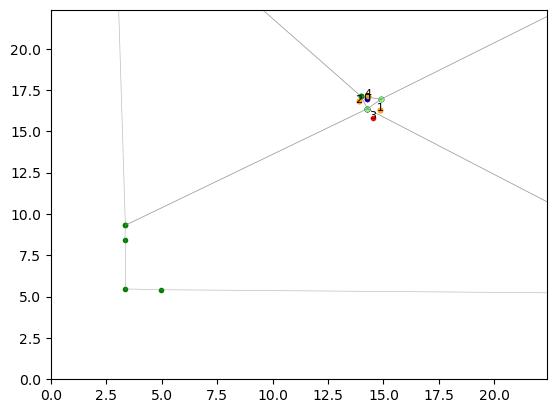

Problem found with eps_sign = 1, trying eps_sign = -1
Retry with eps_sign = -1 successful!
Starting simulation...


  0%|          | 0/1000 [00:00<?, ?it/s]

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1908, 1907) to (1920, 1920) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Saved video as voronoi_video.mp4


In [5]:
simulation_loop(
    N=500, 
    phi=1.00, 
    dt=0.01, 
    T=10, 
    P_0=3.2, 
    J=8.00, 
    run='solid_flocking', 
    equi_steps=200, 
    plot=False, 
    save_interval=5, 
    load_run=None
)

Equilibrating system...


  0%|          | 0/200 [00:00<?, ?it/s]

Shifted:  Finding shared vertices failed! []
midpoint vertices mic: 
 [[13.69740145 13.17597369]
 [13.00167052 12.39154051]
 [13.09571801 12.17757186]
 [14.34717596 12.16388348]
 [14.39992497 12.73878929]
 [14.24179296 12.95316767]]
neighboring vertices mic: 
 [[14.34717784 12.16387978]
 [12.77679408  1.46692182]
 [17.09422539  1.28402468]
 [ 2.76064383  1.2180882 ]
 [ 2.53026599  9.736029  ]]
shared vertices: 
 []
Neigbor: 5
Neighbors of cell 0: [1 2 3 4 6 7]
Matching indices:  [0 8]


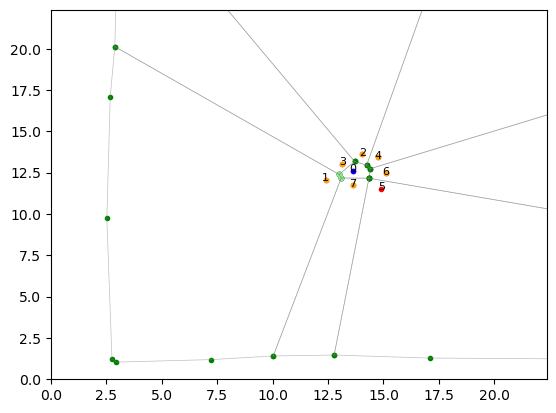

Problem found with eps_sign = 1, trying eps_sign = -1
Retry with eps_sign = -1 successful!
Shifted:  Finding shared vertices failed! []
midpoint vertices mic: 
 [[15.31446081 10.97151858]
 [15.58827223 11.64623096]
 [15.34666163 11.93373924]
 [14.34718124 12.16387308]
 [14.28339198 11.72935739]
 [15.17751261 10.85916579]]
neighboring vertices mic: 
 [[14.34717856 12.16387837]
 [15.30988582  0.29641286]
 [10.16146636  0.8440557 ]
 [ 6.63352413  0.98813002]
 [ 4.16193772  0.98700413]
 [ 3.38608671  0.21083611]
 [ 3.53380812 13.25477471]
 [ 3.60804556 12.28134373]]
shared vertices: 
 []
Neigbor: 2
Neighbors of cell 0: [1 3 4 5 6 7]
Matching indices:  [4 5]


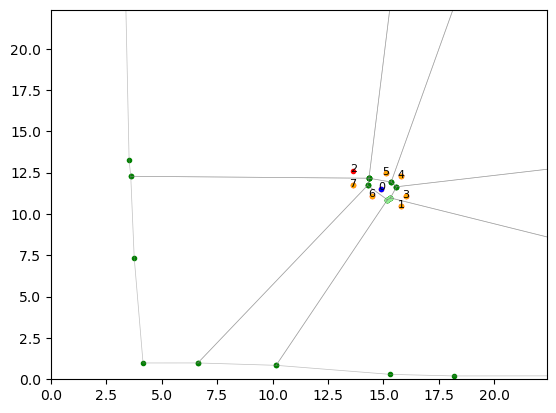

Problem found with eps_sign = 1, trying eps_sign = -1
Retry with eps_sign = -1 successful!
Shifted:  Finding shared vertices failed! []
midpoint vertices mic: 
 [[ 3.43731768 15.78134933]
 [ 3.63456054 16.22040581]
 [ 3.65010042 16.61199056]
 [ 2.72567154 16.45793096]
 [ 2.58220067 15.40595731]]
neighboring vertices mic: 
 [[14.06762967 12.87510918]
 [13.73316533  6.66204551]
 [13.70170109  4.85484621]
 [14.50313227  4.08701283]
 [18.98991337  4.21339226]
 [ 4.94913551  4.63501388]
 [ 2.58219718 15.40595452]
 [14.54766531 19.00029735]]
shared vertices: 
 []
Neigbor: 6
Neighbors of cell 0: [1 2 3 4 5]
Matching indices:  [0 4]


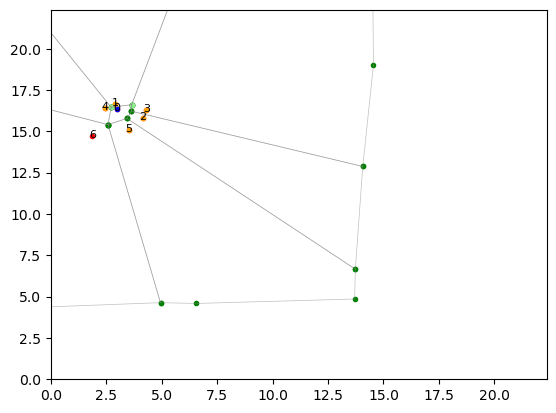

Problem found with eps_sign = 1, trying eps_sign = -1
Retry with eps_sign = -1 successful!
Starting simulation...


  0%|          | 0/1000 [00:00<?, ?it/s]

Shifted:  Finding shared vertices failed! []
midpoint vertices mic: 
 [[16.43441033 13.88754865]
 [17.31431287 13.06750732]
 [17.82413252 13.2275468 ]
 [17.92053718 13.33334935]
 [17.8971156  13.528184  ]
 [17.02917698 14.38512067]]
neighboring vertices mic: 
 [[ 7.09303878  2.85255333]
 [16.4344049  13.88754763]
 [ 6.28109087  2.54939393]
 [ 5.86459665  2.15898345]
 [ 5.94870278 11.71331292]
 [ 6.56631316  2.83531691]]
shared vertices: 
 []
Neigbor: 2
Neighbors of cell 0: [1 3 4 5 6 7]
Matching indices:  [1 2]


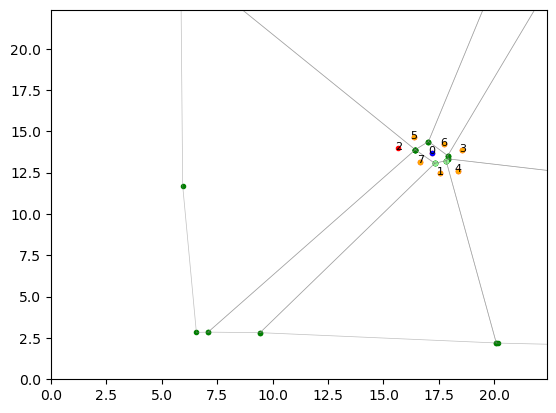

Problem found with eps_sign = 1, trying eps_sign = -1
Retry with eps_sign = -1 successful!
Shifted:  Finding shared vertices failed! []
midpoint vertices mic: 
 [[5.8432758  8.17131864]
 [6.30119798 9.14125026]
 [5.75068139 9.52871184]
 [4.95834476 8.97878531]]
neighboring vertices mic: 
 [[16.97050305  4.32268154]
 [ 5.84327727  8.17130588]
 [20.63966937 20.19164302]
 [ 4.31919875 19.86418081]
 [16.9845088  19.97965283]
 [17.1978149  20.2037671 ]]
shared vertices: 
 []
Neigbor: 5
Neighbors of cell 0: [1 2 3 4]
Matching indices:  [3 4]


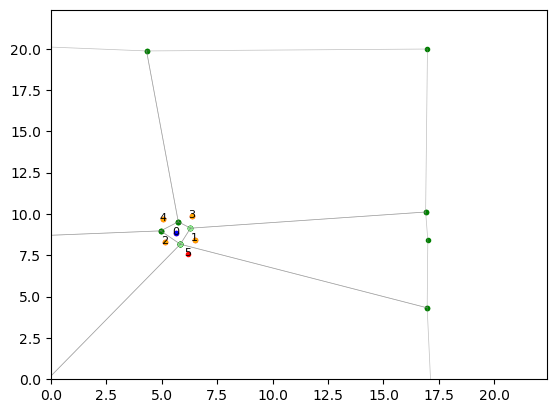

Problem found with eps_sign = 1, trying eps_sign = -1
Retry with eps_sign = -1 successful!
Shifted:  Finding shared vertices failed! []
midpoint vertices mic: 
 [[5.84327771 8.17130205]
 [5.49196019 7.6910481 ]
 [6.06234913 6.88940971]
 [6.20112792 6.8536449 ]
 [6.47470925 7.09268359]
 [6.71145088 7.87103266]]
neighboring vertices mic: 
 [[ 5.84327739  8.17130484]
 [10.8060396  18.68327017]
 [17.3202131  18.8351196 ]
 [17.06808766 18.57208902]
 [17.0725514  18.32848416]]
shared vertices: 
 []
Neigbor: 2
Neighbors of cell 0: [1 3 4 5 6 7]
Matching indices:  [4 5]


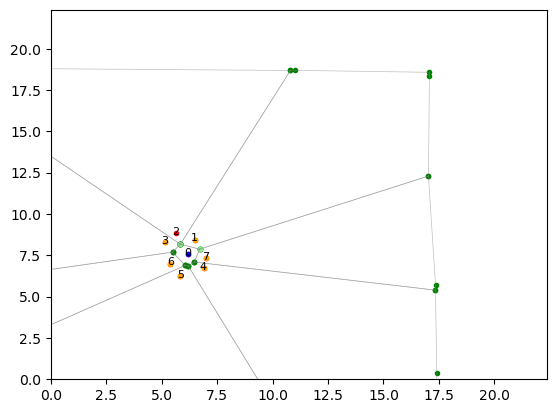

Problem found with eps_sign = 1, trying eps_sign = -1
Retry with eps_sign = -1 successful!
Shifted:  Finding shared vertices failed! []
midpoint vertices mic: 
 [[12.93689224 19.9634494 ]
 [12.46974548 19.91521202]
 [12.13671231 18.88208393]
 [13.06664748 18.77681554]
 [13.22881676 19.15902034]]
neighboring vertices mic: 
 [[ 9.12843912  8.26118823]
 [12.13670373 18.88208066]
 [ 1.69722535  1.89201517]
 [ 1.53226995 21.18314432]
 [ 1.4065228   7.99043647]
 [ 1.46506962  7.93451816]]
shared vertices: 
 []
Neigbor: 5
Neighbors of cell 0: [1 2 3 4 6]
Matching indices:  [3 4]


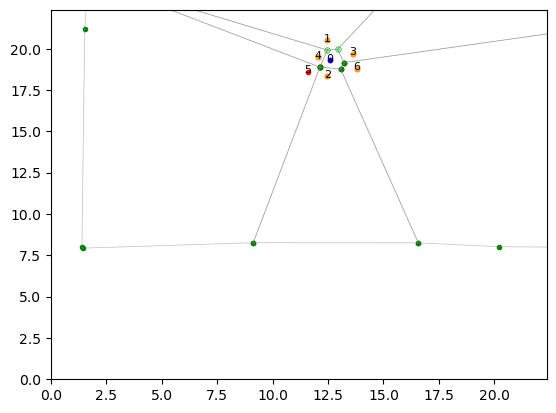

Problem found with eps_sign = 1, trying eps_sign = -1
Retry with eps_sign = -1 successful!
Shifted:  Finding shared vertices failed! []
midpoint vertices mic: 
 [[12.93689402 19.96345194]
 [12.469734   19.91521668]
 [12.13671227 18.88208391]
 [13.06664376 18.7768267 ]
 [13.22880952 19.15901897]]
neighboring vertices mic: 
 [[ 9.12843912  8.26118823]
 [12.13670373 18.88208066]
 [ 1.69722535  1.89201517]
 [ 1.53226995 21.18314432]
 [ 1.4065228   7.99043647]
 [ 1.46506962  7.93451816]]
shared vertices: 
 []
Neigbor: 5
Neighbors of cell 0: [1 2 3 4 6]
Matching indices:  [3 4]


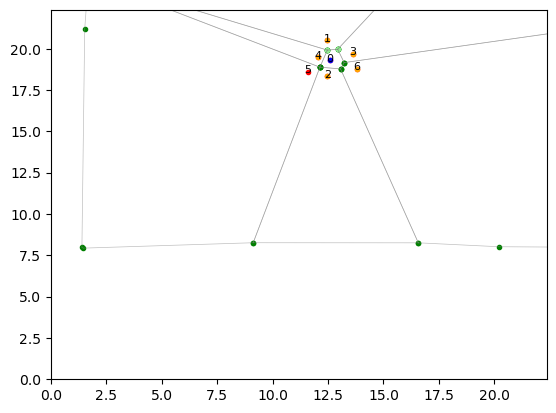

Problem found with eps_sign = 1, trying eps_sign = -1
Retry with eps_sign = -1 successful!
Shifted:  Finding shared vertices failed! []
midpoint vertices mic: 
 [[10.68281452 11.24945855]
 [11.28654253 11.92077712]
 [10.89088251 12.54152597]
 [10.25113886 12.51283257]
 [10.10018889 12.02518744]]
neighboring vertices mic: 
 [[19.09999082  0.74667015]
 [10.6828138  11.24945372]
 [21.94813145  5.45293642]
 [21.77787367  0.7502151 ]
 [21.86231058  0.66143846]
 [ 2.23329202  0.55103778]
 [16.73309907  0.63085132]]
shared vertices: 
 []
Neigbor: 1
Neighbors of cell 0: [2 3 4 5 6]
Matching indices:  [5 6]


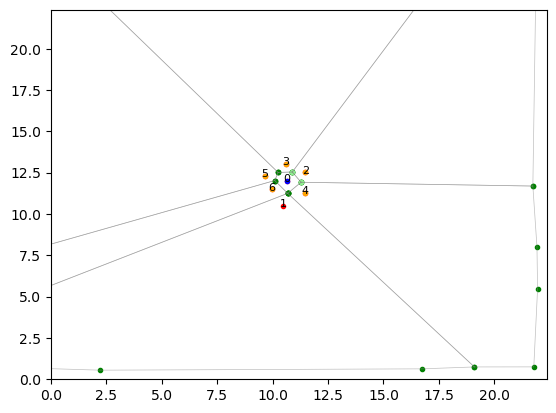

Problem found with eps_sign = 1, trying eps_sign = -1
Retry with eps_sign = -1 successful!
Shifted:  Finding shared vertices failed! []
midpoint vertices mic: 
 [[10.68867286  1.26464124]
 [11.11273615  2.09422861]
 [10.92822374  2.43579121]
 [10.34981536  2.55205465]
 [ 9.74413446  1.79942366]]
neighboring vertices mic: 
 [[ 9.7441315   1.79942318]
 [21.87671313  7.27104681]
 [21.4562823   0.16246287]
 [21.434966   13.30068953]
 [21.90026342 12.86326213]
 [ 3.75727136 12.97904909]
 [ 5.98455807 13.13987137]]
shared vertices: 
 []
Neigbor: 6
Neighbors of cell 0: [1 2 3 4 5]
Matching indices:  [2 3]


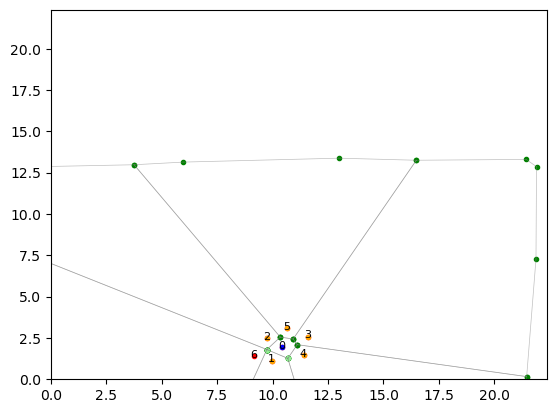

Problem found with eps_sign = 1, trying eps_sign = -1
Retry with eps_sign = -1 successful!


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1908, 1907) to (1920, 1920) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Saved video as voronoi_video.mp4


In [4]:
simulation_loop(
    N=500, 
    phi=1.00, 
    dt=0.01, 
    T=10, 
    P_0=3.8, 
    J=8.00, 
    run='liquid_flocking', 
    equi_steps=200, 
    plot=False, 
    save_interval=5, 
    load_run=None
)

### Create Plots and videos

In [3]:
runs = ["liquid_phi_1.0"]

### edges plot
# Load the data
for run in runs:
    print(f"Processing run: {run}")
    # Load positions
    path = os.path.join("data", run, "pos_all.npy")
    pos_all = np.load(path)
    params = init.load_params(run)
    L = params['L']
    N = params['N']
    start = 0
    if run == "solid_phi_1.0":
        start = 2655
    for t in tqdm(range(start, pos_all.shape[0])):
        cells = voronoi_tessellation(pos_all[t], L=L, N=N)
        plot_voronoi(cells, None, L, run=run, step=t, plot=False, plot_edges=True, plot_midpoints=False, plot_polarizations=False, plot_vertices=False, subfolder="images_edges")
    make_video_from_images(
        run,
        output_video="edges.mp4",
        start=0,
        step=1,
        fps=10,
        subfolder="images_edges",
    )

Processing run: liquid_phi_1.0


  0%|          | 0/5000 [00:00<?, ?it/s]

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1908, 1907) to (1920, 1920) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Saved video as edges.mp4


In [2]:
make_video_from_images(
        run = "liquid_phi_0.5",
        output_video="edges.mp4",
        start=0,
        step=1,
        fps=10,
        subfolder="images_edges",
    )

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1908, 1907) to (1920, 1920) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Saved video as edges.mp4


In [3]:
runs = ["liquid_phi_0.5"]
# midpoints plot
for run in runs:
    print(f"Processing run: {run}")
    # Load positions
    path = os.path.join("data", run, "pos_all.npy")
    pos_all = np.load(path)
    params = init.load_params(run)
    L = params['L']
    N = params['N']
    subfolder = "images_midpoints"
    plot = False
    start = 0
    stop = pos_all.shape[0]
    stop = 1905
    for t in tqdm(range(start, stop)):
        midpoints = pos_all[t]

        fig, ax = plt.subplots(figsize=(8, 8))
        ax.scatter(midpoints[:, 0], midpoints[:, 1], c='black', marker='.', s=10)
        ax.set_xlim(0, L)
        ax.set_ylim(0, L)
        ax.set_aspect('equal', adjustable='box')
        ax.set_xticks([])
        ax.set_yticks([])

        # save plot
        output_dir = os.path.join("data", run, subfolder)
        os.makedirs(output_dir, exist_ok=True)
        filename = os.path.join(output_dir, f"voronoi_{t}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')

        if plot:
            plt.show()
        else:
            plt.close(fig)
        
    make_video_from_images(
        run,
        output_video="midpoints.mp4",
        start=0,
        step=1,
        fps=10,
        subfolder="images_midpoints",
    )

Processing run: liquid_phi_0.5


  0%|          | 0/1905 [00:00<?, ?it/s]

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1908, 1907) to (1920, 1920) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Saved video as midpoints.mp4


In [3]:
run = "solid_phi_0.25"
make_video_from_images(
    run,
    output_video="edges.mp4",
    start=0,
    step=1,
    fps=10,
    subfolder="images_edges",
)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1908, 1907) to (1920, 1920) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Saved video as edges.mp4


## Anlalysis

In [4]:
pos_all_test = np.load(os.path.join(output_dir, "pos_all.npy"))
pos_all_test.shape

(100, 100, 2)

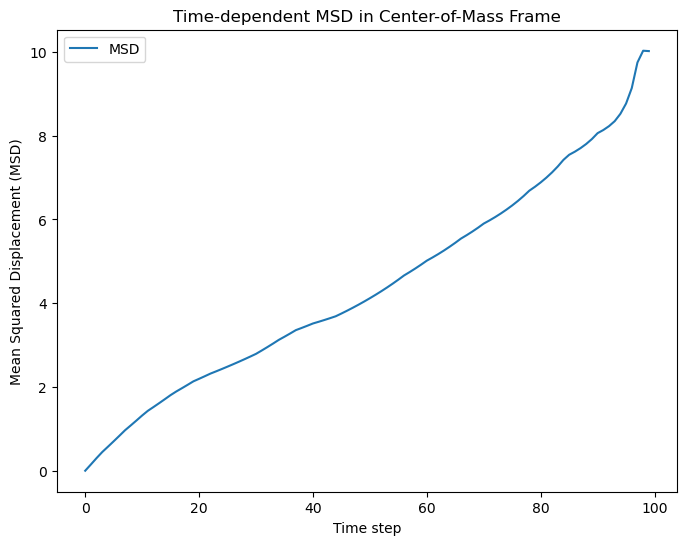

In [5]:
vis.MSD_plot(run)

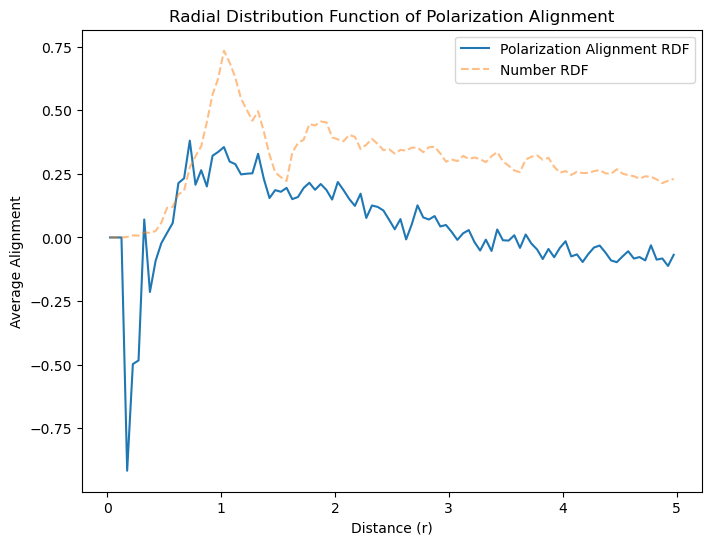

In [6]:
vis.rdf_pol_alignment_plot(run)

### Video Creation

In [25]:
run = 'solid_phi_2.0'

In [26]:
make_video_from_images(
    run,
    start=0,
    step=5,
    fps=10
)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1908, 1907) to (1920, 1920) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Saved video as data/solid_phi_2.0\voronoi_video.mp4


## TO-DO:
- check $\nabla_i A_i$ from ChatGPT numerically
- make everything faster
    - check which step uses up the most time and see if i can optimize it (if its not the voronoi tesselation i can)
    - if it is the voronoi tessellation we should look at alternatives
- try to observe the transitions and safe some movies for it
- check if the results we get are correct
    - either use values from the paper and check for the transitions
    - or check for energy conservation for f_0 = 0 and included kinetic energy
    - turn of interactions and see if we get diffusion (at least due to D_r =/ 0)

    - check if the relaxation of the polarisation works towards its velocity/force
    - make it possible to check for global velocity by saving it
- make the plot function better
